In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data (1)', index_col = 0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [7]:
df['TARGET CLASS'].value_counts()

0    500
1    500
Name: TARGET CLASS, dtype: int64

In [8]:
# feature scaling
# so no need to check outlier

from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [10]:
scaled_fea= scaler.transform(df.drop('TARGET CLASS',axis=1))

In [11]:
df_fea = pd.DataFrame(scaled_fea, columns= df.columns[:-1])
df_fea

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [12]:
x = df_fea
y = df['TARGET CLASS']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=555)


In [14]:
# KNN model , K should be odd
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
# prediction and evaluation by using confusion matrix, accuracy score and classifiation report


In [18]:
# train is used to check whether the model is underfot or overfit
pred_train = knn.predict(x_train)
pred_test = knn.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
print(confusion_matrix(y_train, pred_train))
print(confusion_matrix(y_test, pred_test))

[[373   0]
 [  0 377]]
[[109  18]
 [ 12 111]]


In [21]:
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       377

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       127
           1       0.86      0.90      0.88       123

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250



In [22]:
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

1.0
0.88


In [23]:
# to find the best hyper tunning - K by using elbow method

In [24]:
error_rate = []

for i in range (1,40):
    knn = knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [25]:
error_rate

[0.12,
 0.104,
 0.068,
 0.072,
 0.072,
 0.072,
 0.08,
 0.06,
 0.08,
 0.076,
 0.076,
 0.084,
 0.08,
 0.076,
 0.068,
 0.072,
 0.068,
 0.08,
 0.08,
 0.08,
 0.068,
 0.076,
 0.064,
 0.072,
 0.064,
 0.076,
 0.068,
 0.068,
 0.068,
 0.072,
 0.068,
 0.064,
 0.068,
 0.068,
 0.068,
 0.068,
 0.064,
 0.06,
 0.06]

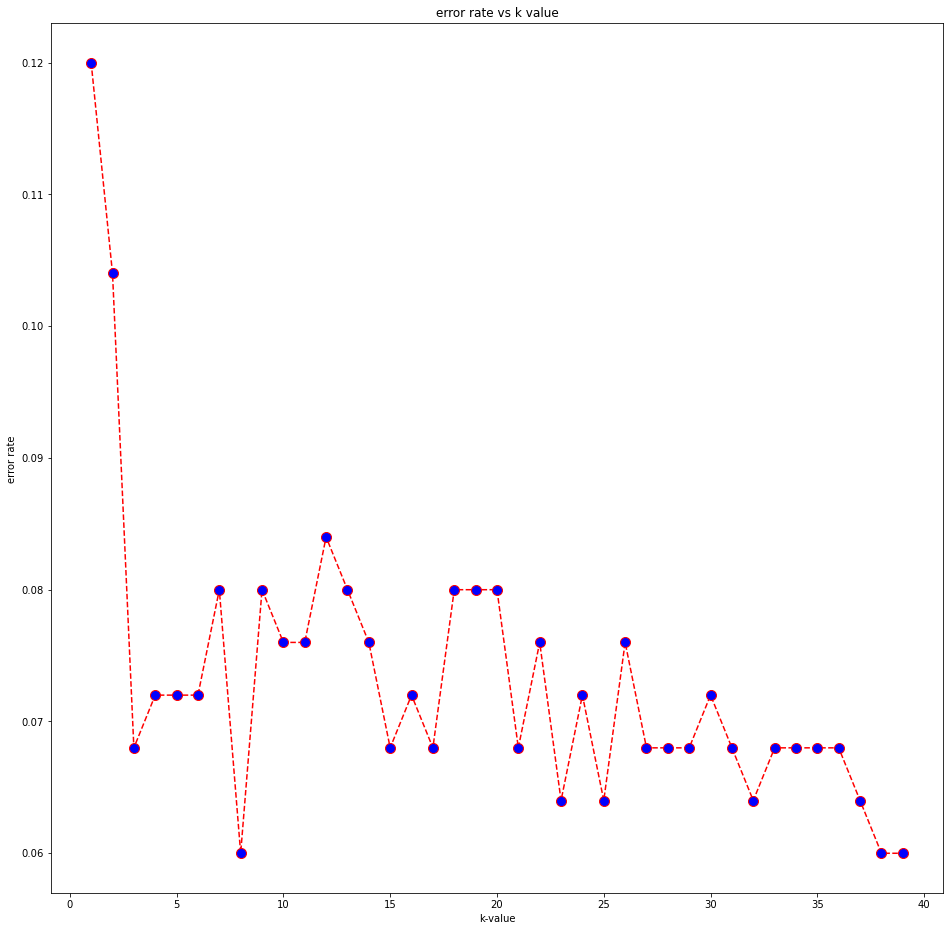

In [26]:
plt.figure(figsize=(16,16))
plt.plot(range(1,40),error_rate, color = 'Red', linestyle='dashed', marker='o', markerfacecolor='blue',markersize=10)
plt.title('error rate vs k value')
plt.xlabel('k-value')
plt.ylabel('error rate ')
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(x_train,y_train)
pred_y = knn.predict(x_test)


In [28]:
print(accuracy_score(y_test,pred_y))

0.94


In [ ]:
#training accuracy - 100
#test accuracy - 94

so very good model

In [ ]:
#regressor
#classifier......................................

In [30]:
# cross validation.......................

from sklearn.model_selection import cross_val_score

In [31]:
accuracy = cross_val_score(knn, X=x_test, y=y_test,cv=10)

In [32]:
accuracy

array([0.8 , 0.92, 0.96, 0.92, 1.  , 1.  , 0.88, 0.92, 0.96, 0.8 ])